In [59]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Announcements + Discussion 

0-5 mins

## Functions

5-20 mins

Before, we've seen these:

In [2]:
abs(-2)

2

In [3]:
max(1, 2, 3)

3

Let's suppose we want to convert a number from degrees Celsius to Fahrenheit. There's no built-in function for that...

In [4]:
100 * (9/5) + 32

212.0

In [5]:
30 * (9/5) + 32

86.0

In [6]:
21 * (9/5) + 32

69.80000000000001

Lots of repetition! Looks like there's a better way.

In [7]:
def fahrenheit(x):
    """ Converts x to deg F """
    return x * (9/5) + 32

In [8]:
fahrenheit(100)

212.0

In [9]:
fahrenheit(0)

32.0

In [10]:
y = 100
fahrenheit(y/4)

77.0

In [11]:
x

NameError: name 'x' is not defined

In [15]:
x = 25
fahrenheit(x)

77.0

In [16]:
x

25

Discussion question!

In [17]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round((counts/total)*100, 2)

array([ 16.67,  33.33,  50.  ])

In [18]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [19]:
percents(make_array(2, 4, 8, 6))

array([ 10.,  20.,  40.,  30.])

Write this without default arg first.

In [25]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [ 28.6  14.3  57.1]
Rounded to the default number of decimal places: [ 28.57  14.29  57.14]


## Interact

20-25 mins

In [72]:
_ = interact(fahrenheit, x=50)

In [61]:
_ = interact(fahrenheit, x=(0, 100, 5))

Widget Javascript not detected.  It may not be installed or enabled properly.


In [62]:
_ = interact(fahrenheit, x=make_array(0, 20, 30, 50))

Widget Javascript not detected.  It may not be installed or enabled properly.


## Apply

25-35 mins

In [26]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [27]:
cut_off_at_a_billion(123)

123

In [28]:
cut_off_at_a_billion(123456789)

123456789

In [29]:
cut_off_at_a_billion(1234567890)

1000000000.0

In [30]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Avatar,Fox,760507625,846120800,2009
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002
Return of the Jedi,Fox,309306177,818316900,1983
Independence Day,Fox,306169268,602639200,1996
The Empire Strikes Back,Fox,290475067,854171500,1980
Home Alone,Fox,285761243,589287500,1990
Night at the Museum,Fox,250863268,322261900,2006


In [32]:
cut_off_at_a_billion(top.column('Gross (Adjusted)').item(0))

846120800

In [33]:
cut_off_at_a_billion(top.column('Gross (Adjusted)'))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([  8.46120800e+08,   7.85715000e+08,   1.00000000e+09,
         5.16123900e+08,   4.65175700e+08,   8.18316900e+08,
         6.02639200e+08,   8.54171500e+08,   5.89287500e+08,
         3.22261900e+08,   3.64479500e+08,   4.58354100e+08,
         3.26064000e+08,   3.64091400e+08,   1.00000000e+09,
         5.33968300e+08,   4.79104000e+08,   3.28182900e+08,
         3.34062200e+08,   6.13853300e+08,   3.97131200e+08,
         4.77647100e+08,   4.67052600e+08,   3.46595500e+08,
         5.84496100e+08,   5.69454500e+08])

In [34]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion>

In [35]:
type(cut_off_at_a_billion)

function

In [36]:
cut_off_at_a_billion?

In [37]:
help(cut_off_at_a_billion)

Help on function cut_off_at_a_billion in module __main__:

cut_off_at_a_billion(x)
    The smaller of x and 1,000,000,000



## Prediction

35-50 mins

In [38]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


Why are the child bars shorter than the father and mother bars?

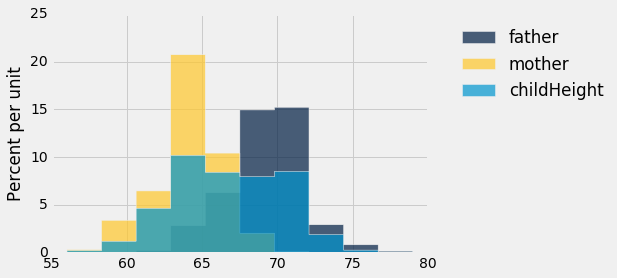

In [47]:
galton.select(1, 2, 7).hist()

In [48]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


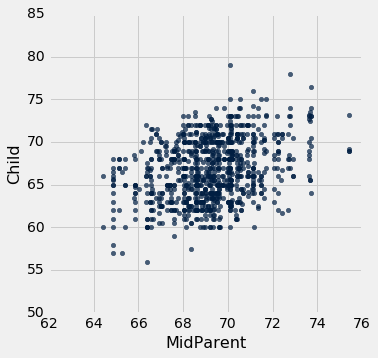

In [49]:
heights.scatter(0)

In [50]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [51]:
close_to_68.column('Child').mean()

66.24045801526718

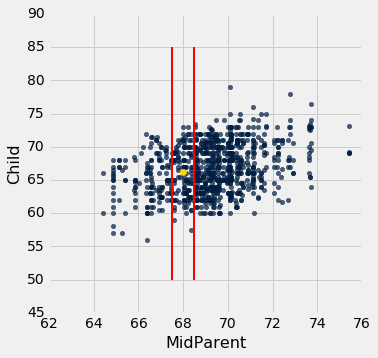

In [41]:
heights.scatter('MidParent')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

In [52]:
def predict_child(mp):
    close_points = heights.where('MidParent', are.between(mp - 0.5, mp + 0.5))
    return close_points.column('Child').mean()                       

In [53]:
predict_child(68)

66.24045801526718

In [54]:
predict_child(74)

70.415789473684214

In [55]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

In [56]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


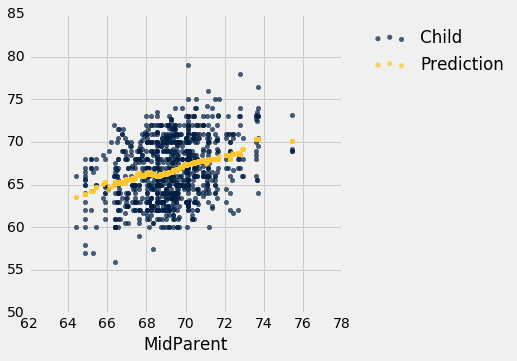

In [57]:
heights_with_predictions.scatter('MidParent')

## Apply with two arguments

In [66]:
first = galton.row(0)
first

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.430000000000007, children=4, childNum=1, gender='male', childHeight=73.200000000000003)

In [67]:
father = first.item('father')
mother = first.item('mother')
(father + 1.08 * mother) / 2

75.430000000000007

In [68]:
def mid_parent(father, mother):
    return (father + 1.08 * mother) / 2

In [69]:
galton.take(np.arange(10)).apply(mid_parent, 'father', 'mother')

array([ 75.43,  75.43,  75.43,  75.43,  73.66,  73.66,  73.66,  73.66,
        72.06,  72.06])

In [70]:
def mid_parent_from_row(row):
    return (row.item('father') + 1.08 * row.item('mother')) / 2

In [71]:
galton.take(np.arange(10)).apply(mid_parent_from_row)

array([ 75.43,  75.43,  75.43,  75.43,  73.66,  73.66,  73.66,  73.66,
        72.06,  72.06])